In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
boston_dataset=datasets.load_boston()
boston_dataset

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
x=boston_dataset.data
y=boston_dataset.target


In [4]:
df=pd.DataFrame(x,columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
correlation=df.corr()

<AxesSubplot:>

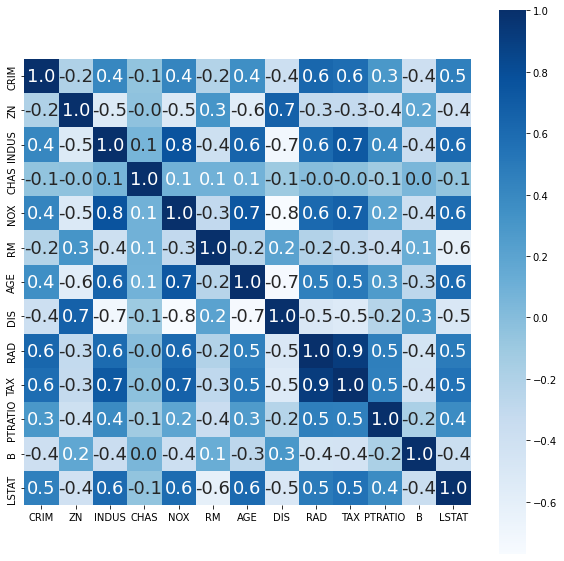

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':18},cmap='Blues')

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [10]:
model=LinearRegression()

In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_test_pred=model.predict(x_test)

In [13]:
y_train_pred=model.predict(x_train)

In [14]:
train_score=metrics.r2_score(y_train,y_train_pred)
train_score

0.7552642156625122

In [15]:
test_score=metrics.r2_score(y_test,y_test_pred)
test_score

0.6795424207402825

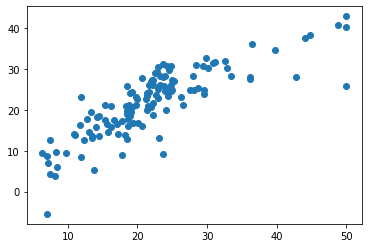

In [16]:
plt.scatter(y_test,y_test_pred)

In [17]:
for i in range(1,13):
    for j in range(1,13):
        
        c=x[:,i-1]*x[:,j-1]
        x=np.c_[x,c]
x

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.17482400e+05, 6.07257000e+03, 1.57529610e+05],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        9.60498000e+04, 7.06482000e+03, 1.57529610e+05],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        9.50648600e+04, 6.99237400e+03, 1.54315409e+05],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.08353700e+05, 8.33490000e+03, 1.57529610e+05],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.07411850e+05, 8.26245000e+03, 1.54802902e+05],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.08353700e+05, 8.33490000e+03, 1.57529610e+05]])

In [18]:
df2=pd.DataFrame(x)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,916.8390,0.0,213.53220,2609.61750,25877.880,1623.321000,396.90,117482.40,6072.570,157529.6100
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,2806.0830,0.0,186.14610,2548.49490,31315.410,1971.441990,793.80,96049.80,7064.820,157529.6100
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,2777.3081,0.0,184.23727,2822.48355,24001.913,1951.225893,785.66,95064.86,6992.374,154315.4089
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,860.2934,0.0,180.74054,2761.62074,18074.054,2392.325986,1183.89,87607.86,7379.581,155732.8369
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,865.2420,0.0,181.78020,2836.64430,21511.980,2406.087180,1190.70,88111.80,7422.030,157529.6100


In [19]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.00000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,...,3749.061844,25.800217,193.832699,2249.764655,23757.335356,1409.522780,3053.44749,138823.11502,6547.619334,135534.645253
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,...,2560.080964,95.746354,59.942510,644.671808,11628.065204,887.420202,2960.05577,64619.91997,1837.557901,41830.850997
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,...,5.792000,0.000000,0.228160,2.159680,29.632000,0.743552,7.68000,213.12000,6.464000,0.102400
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,...,1603.496250,0.000000,169.326430,2188.539243,13423.871250,729.357886,1483.70250,101240.04000,6140.250000,140908.274275
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,...,2987.280950,0.000000,194.084100,2387.307590,25828.829500,1227.290435,1933.35000,119658.91500,7078.025500,153225.273700
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,...,6244.352700,0.000000,227.295160,2568.006645,34071.304500,2020.823580,2778.30000,160982.30250,7695.286500,156994.250700
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,...,11010.006000,396.900000,345.699900,3391.948800,39690.000000,4662.154190,9525.60000,282195.90000,8421.600000,157529.610000


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [21]:
model2=LinearRegression()

In [22]:
model2.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred2_train=model2.predict(x_train)

In [24]:
y_pred2=model2.predict(x_test)

In [25]:
score2_train=metrics.r2_score(y_train,y_pred2_train)
score2_train

0.9175942090693865

In [26]:
score2=metrics.r2_score(y_test,y_pred2)
score2

0.741908302510454

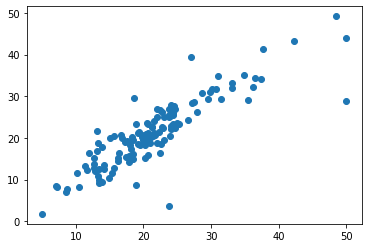

In [27]:
plt.scatter(y_test,y_pred2)